<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Изменение-типов-данных." data-toc-modified-id="Изменение-типов-данных.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных.</a></span></li><li><span><a href="#Удаление-дубликатов." data-toc-modified-id="Удаление-дубликатов.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Удаление дубликатов.</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Базовые-параметры" data-toc-modified-id="Базовые-параметры-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Базовые параметры</a></span></li><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Время продажи квартиры</a></span></li><li><span><a href="#Удаление-выбросов" data-toc-modified-id="Удаление-выбросов-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Удаление выбросов</a></span></li><li><span><a href="#Общий-анализ-цены" data-toc-modified-id="Общий-анализ-цены-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Общий анализ цены</a></span></li><li><span><a href="#Анализ-НП-с-наибольшим-числом-объявлений" data-toc-modified-id="Анализ-НП-с-наибольшим-числом-объявлений-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ НП с наибольшим числом объявлений</a></span></li><li><span><a href="#Анализ-цены-в-Санкт-Петербурге" data-toc-modified-id="Анализ-цены-в-Санкт-Петербурге-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Анализ цены в Санкт-Петербурге</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
df_movies.info()
display(df_movies.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
display(df.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Данные имеют много пропусков. В некоторых столбцах нужно изменить тип данных. В данных есть вбросы "больших" квартир по количеству комнат, площади, высоты потолков.

## Предобработка данных

### Заполнение пропусков

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в `ceiling_height (высота потолков)` можно заменить медианным значением. Скорее всего пользователь просто не указал.

In [6]:
df['ceiling_height'] = df['ceiling_height'].fillna(value=df['ceiling_height'].median())

Пропусков в `floors_total` и `locality_name` очень маленькое количество и их можно просто удалить.

In [7]:
df.dropna(subset=['floors_total', 'locality_name'], inplace=True)

Логично предположить, если человек не указал число балконов — скорее всего, их нет. Пропуски можно заменить на 0.

In [8]:
df['balcony'] = df['balcony'].fillna(value=0)

In [9]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [10]:
df['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

Аналогично с `is_apartment`, заменим пропуски на `False`. Аналогично, скорее всего пользователь просто не стал указывать, что это не апартаменты.

In [11]:
df['is_apartment'] = df['is_apartment'].fillna(value=False)

In [12]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Заполним пропуски `living_area` и `kitchen_area`. Найдем средний коэффициент отношения полной площади квартиры к жилой площади и кухне. Тут тоже наверное пользователь не стал указывать конкретику по площадям.

In [13]:
df['living_area_coef'] = round(df['living_area'].median() / df['total_area'].median(), 2)
df['kitchen_area_coef'] = round(df['kitchen_area'].median() / df['total_area'].median(), 2)

In [14]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coef,kitchen_area_coef
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.58,0.18
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.58,0.18
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.58,0.18
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.58,0.18
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.58,0.18


Напишем функции по расчету жилой площади и кухни.

In [15]:
def living_area(total_area, living_area_coef):
    return total_area * living_area_coef

In [16]:
def kitchen_area(total_area, kitchen_area_coef):
    return total_area * kitchen_area_coef

In [17]:
df['living_area'] = df.apply(
    lambda x: living_area(x.total_area, x.living_area_coef) if np.isnan(x.living_area) else x.living_area, axis=1
)

In [18]:
df['kitchen_area'] = df.apply(
    lambda x: kitchen_area(x.total_area, x.kitchen_area_coef) if np.isnan(x.kitchen_area) else x.kitchen_area, axis=1
)

In [19]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
living_area_coef            0
kitchen_area_coef           0
dtype: int64

Пропуски в `days_exposition` - предложение еще актуально и не снято с продажи, судя по описанию данных. Пропуски в картографических данных возможны из-за ошибки выгрузки или не точный алгоритм определения этих данных.

### Изменение типов данных.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Заменим тип данных `first_day_exposition` на правильный тип `datetime`. Так же заменим некоторые данные float64 на целочисленный int64.

In [21]:
df['first_day_exposition'].head(3)

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
Name: first_day_exposition, dtype: object

In [22]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d')

In [23]:
df['rooms'] = df['rooms'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['floor'] = df['floor'].astype('int')
df['balcony'] = df['balcony'].astype('int')

### Удаление дубликатов.

Проверим данные на дубликаты.

In [24]:
df.duplicated().sum()

0

In [25]:
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [26]:
print(23699 - 23565)

134


Все типы данных приведены к нужным. Удалили 134 строки данных.

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [27]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coef,kitchen_area_coef
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.58,0.18
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.58,0.18
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.58,0.18
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,92.22,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.58,0.18
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.58,0.18


In [28]:
df['meter_price'] = round(df.last_price / df.total_area)

In [29]:
df['day_exposition'] = pd.DatetimeIndex(df.first_day_exposition).day
df['month_exposition'] = pd.DatetimeIndex(df.first_day_exposition).month
df['year_exposition'] = pd.DatetimeIndex(df.first_day_exposition).year

In [30]:
def floor_category(floor, floors_total):
    """
    Возвращает категорию этажа:
    первый, последний, другой.
    """
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [31]:
df['floor_category'] = df.apply(
    lambda x: floor_category(x.floor, x.floors_total), axis=1
)

Cоотношение жилой и общей площади, а также отношение площади кухни к общей мы уже добавляли как среднее значение, когда заполняли пропуски - `living_area_coef` и `kitchen_area_coef`. Сделаем перерасчет и заменим средние значения.

In [32]:
df['living_area_coef'] = df.living_area / df.total_area
df['kitchen_area_coef'] = df.kitchen_area / df.total_area

In [33]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_area_coef,kitchen_area_coef,meter_price,day_exposition,month_exposition,year_exposition,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,2.0,755.0,NaN,0.472222,0.231481,120370.0,7,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,0.0,NaN,81.0,0.460396,0.272277,82921.0,4,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,2.0,574.0,558.0,0.612500,0.148214,92786.0,20,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,92.22,9,False,...,3.0,234.0,424.0,0.580000,0.180000,408176.0,24,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,1.0,48.0,121.0,0.320000,0.410000,100000.0,19,6,2018,другой


## Исследовательский анализ данных

### Базовые параметры

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. <br>Построим гистограммы для каждого параметра.

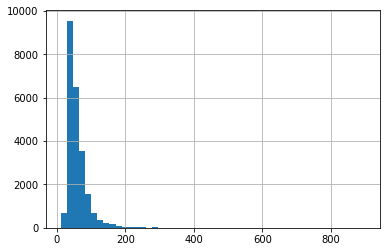

In [34]:
df.total_area.hist(bins=50)
plt.show()

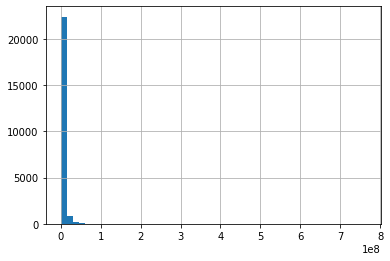

In [35]:
df.last_price.hist(bins=50)
plt.show()

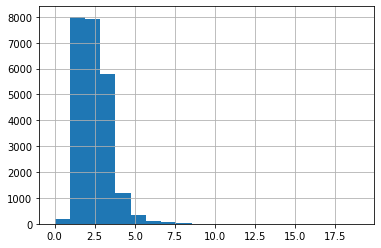

In [37]:
df.rooms.hist(bins=20)
plt.show()

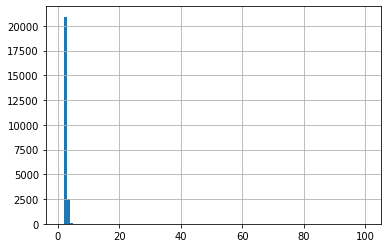

In [38]:
df.ceiling_height.hist(bins=100)
plt.show()

- Везде есть аномально большие данные и редкие значения, которые следует убрать. Высота потолка под 100 метров, количество комнат больше 6, общая площадь больше 200 и т.п.

### Время продажи квартиры

Изучим время продажи квартиры.

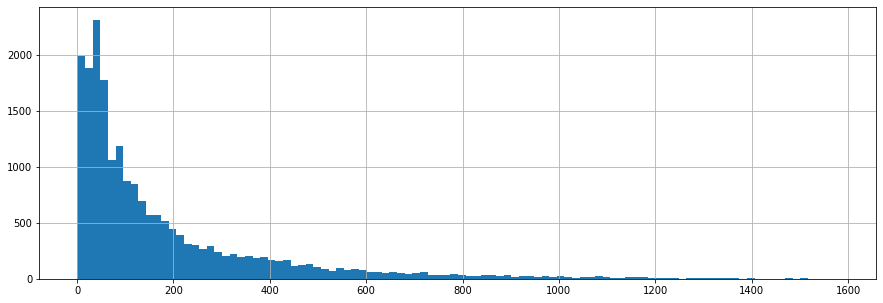

In [39]:
plt.figure(figsize = (15,5))
df.days_exposition.hist(bins=100)
plt.show()

In [38]:
print(df.days_exposition.mean())
print(df.days_exposition.median())

180.7413945278023
95.0


In [39]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coef,kitchen_area_coef,meter_price,day_exposition,month_exposition,year_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,...,8030.000000,18065.000000,9036.000000,20394.000000,23565.000000,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.636538,5.878124,10.526194,0.593677,...,490.580448,0.769499,518.289509,180.741395,0.566129,0.186648,9.940584e+04,15.484023,6.401570,2017.371016
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,22.414084,4.871485,6.058786,0.960660,...,341.572956,0.938669,278.009558,219.732782,0.101138,0.069486,5.038943e+04,8.635819,3.492948,1.037393
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,0.021583,0.025381,1.120000e+02,1.000000,1.000000,2014.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,...,288.000000,0.000000,293.000000,45.000000,0.500000,0.136738,7.656600e+04,8.000000,3.000000,2017.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,455.000000,1.000000,503.000000,95.000000,0.580000,0.180000,9.500000e+04,15.000000,6.000000,2017.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.200000,8.000000,12.000000,1.000000,...,612.000000,1.000000,730.000000,231.000000,0.631732,0.223881,1.142130e+05,23.000000,10.000000,2018.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.000000,0.787879,1.907500e+06,31.000000,12.000000,2019.000000


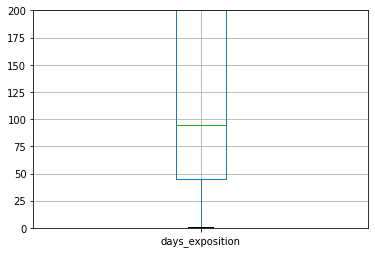

In [40]:
plt.ylim(0, 200)
df.boxplot('days_exposition')
plt.show()

Средний срок продажи составляет 180 дней, однако на этот показатель влияют аномально очень долгие продажи (вбросы). Если судить по медианному значению, то средний срок продажи составляет 95 дней. <br>Думаю можно считать, что продажи прошли быстро когда значения меньше первого квартиля - 45. А необычно долгие продажи - которые находятся выше третьего квартиля - 231.

### Удаление выбросов

Уберем редкие и выбивающиеся значения. Для обнаружения выбросов будем использовать метод межквартильного диапазона (IQR).

Напишем функцию определения диапазонов выбросов.

In [41]:
def clear_IQR(value):
    Q1 = value.quantile(0.25)
    Q3 = value.quantile(0.75)
    iqr = Q3 - Q1
    return Q1 - 1.5 * iqr, Q3 + 1.5 * iqr

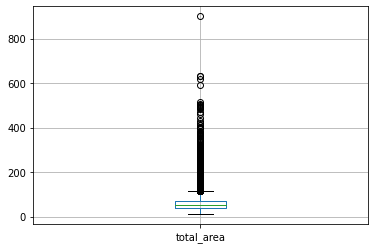

In [42]:
df.boxplot('total_area')
plt.show()

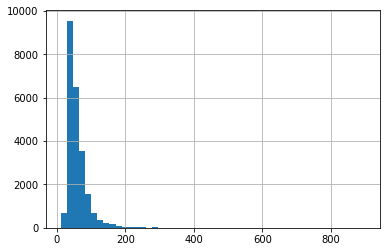

In [43]:
df.total_area.hist(bins=50)
plt.show()

На диаграмме и гистограмме видно большое количество выбросов и редких значений. Гистограмма имеет не нормальное распределение. Определим границу и уберем выбросы.

In [44]:
area_bounds = clear_IQR(df['total_area'])
print(area_bounds[1])

114.25


In [45]:
print('Будет удалено:', len(df.query('total_area > @area_bounds[1]')))
df = df.query('total_area < @area_bounds[1]')

Будет удалено: 1239


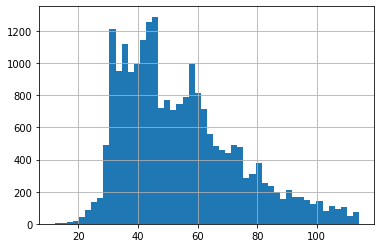

In [46]:
df.total_area.hist(bins=50)
plt.show()

Теперь видим нормальное распределение.

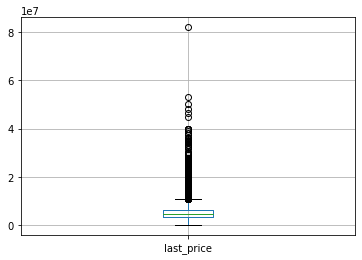

In [47]:
df.boxplot('last_price')
plt.show()

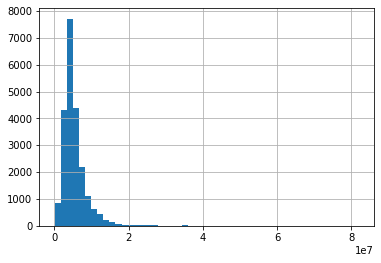

In [48]:
df['last_price'].hist(bins=50)
plt.show()

С ценой аналогично - видно большое количество выбросов и редких значений. Гистограмма имеет не нормальное распределение. Определим границу и уберем выбросы.

In [49]:
price_bounds = clear_IQR(df['last_price'])
print(price_bounds[1])

print('Будет удалено:', len(df.query('last_price > @price_bounds[1]')))
df = df.query('last_price < @price_bounds[1]')

10725000.0
Будет удалено: 1321


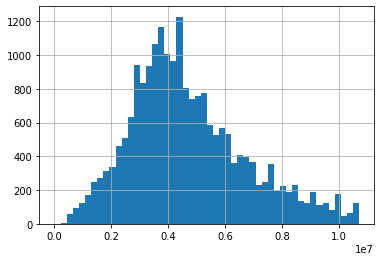

In [50]:
df['last_price'].hist(bins=50)
plt.show()

Получили нормальное распределение.

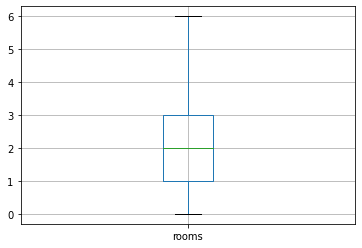

In [51]:
df.boxplot('rooms')
plt.show()

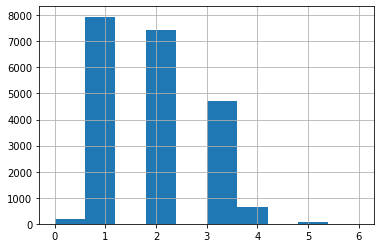

In [52]:
df['rooms'].hist(bins=10)
plt.show()

Тут все хорошо, выбросов нет и гистограмма выглядит нормально.

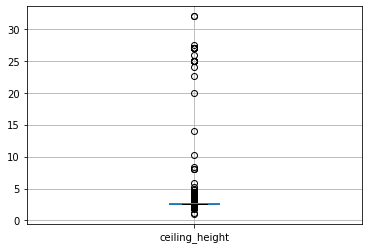

In [53]:
df.boxplot('ceiling_height')
plt.show()

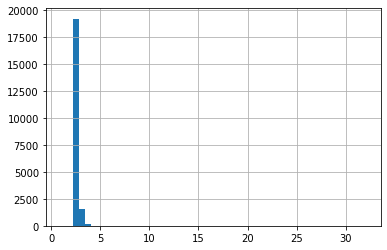

In [54]:
df['ceiling_height'].hist(bins=50)
plt.show()

С потолками видим выбросы и аномально редкие значения. Уберем их.

In [55]:
ceiling_bounds = clear_IQR(df['ceiling_height'])
print(ceiling_bounds[1])

print('Будет удалено:', len(df.query('ceiling_height > @ceiling_bounds[1]')))

2.7249999999999996
Будет удалено: 3687


In [56]:
df['ceiling_height'].describe()

count    21005.000000
mean         2.694568
std          0.793069
min          1.000000
25%          2.600000
50%          2.650000
75%          2.650000
max         32.000000
Name: ceiling_height, dtype: float64

Методом iqr выходит низкая граница и удаляется большое количество данных. Потолки сейчас часто бывают под 3м и больше.  Думаю будет логично взять границы от 2.3м до 3.5м, чтобы отсеять аномальные, редкие и не стандартные значения.

In [57]:
df = df.query('2.3 < ceiling_height < 3.5')

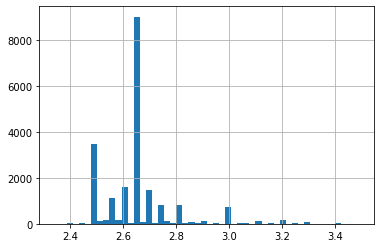

In [58]:
df['ceiling_height'].hist(bins=50)
plt.show()

In [59]:
len(df['ceiling_height'])

20788

In [60]:
print((23565 - 20788) / 23565 * 100)

11.784426055590918


В данных о цене и площади были обнаружены аномально большие и редкие значения, которые были убраны с помощью метода IQR. В данных по потолкам убрали редкие и аномальные значения. После удаления всех выбросов, количество данных уменьшилось на 12%.

### Общий анализ цены

Изучим зависит ли цена от площади, удалённости от центра, числа комнат.

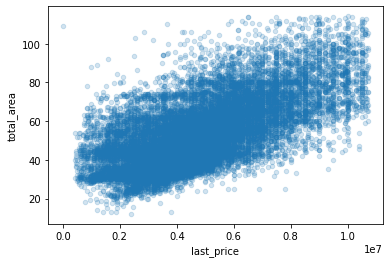

In [61]:
df.plot(x='last_price', y='total_area', kind='scatter', alpha=0.2)
plt.show()

Цена определенно зависит от площади.

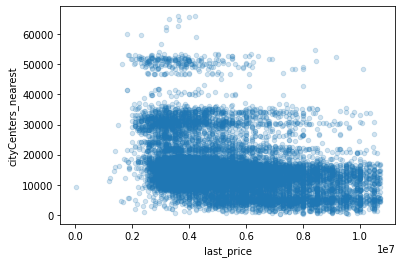

In [62]:
df.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.2)
plt.show()

С удаленностью от центра есть большая зависимость. Очень много дорогих квартир до 20км, после 20км намного меньше, а больше 40 - практически нет.

Изучим зависимость средней цены за метр от того, на каком этаже расположена квартира: первом, последнем или другом.

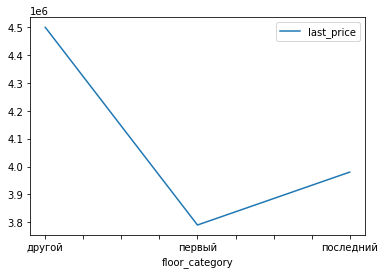

In [63]:
df.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot()
plt.show()

Очевидно, первый этаж не пользуется популярностью. Самая низкая стоимость на первом этаже, последний этаж чуть дороже. Средние этажи на порядок дороже.

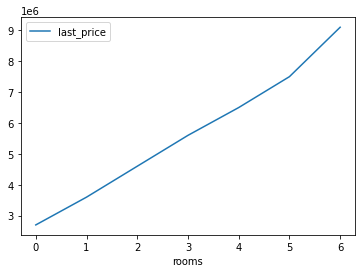

In [64]:
df.pivot_table(index='rooms', values='last_price', aggfunc='median').plot()
plt.show()

Чем больше комнат - тем дороже квартира. <br>
Проверим зависимость от даты размещения: дня недели, месяца и года.

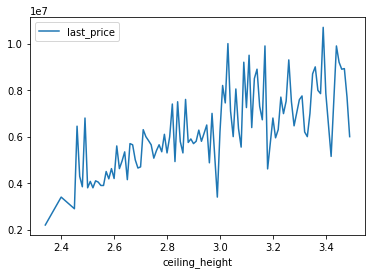

In [65]:
df.pivot_table(index='ceiling_height', values='last_price', aggfunc='median').plot()
plt.show()

Чем выше потолки - выше цена.

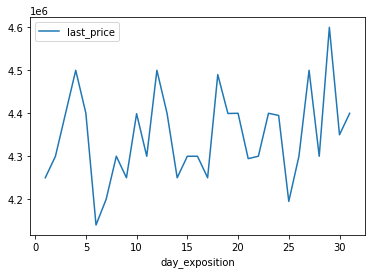

In [66]:
df.pivot_table(index='day_exposition', values='last_price', aggfunc='median').plot()
plt.show()

Очевидной зависимости от дня размещения нет.

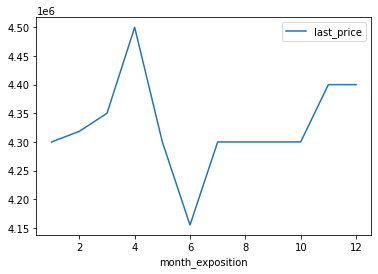

In [67]:
df.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot()
plt.show()

Можно предположить, что цены в середине года/начало лето - самые низкие.

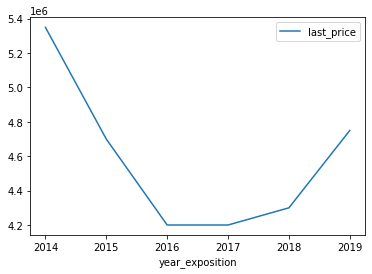

In [68]:
df.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot()
plt.show()

С 2014 по 2016 год цены упали, но с 2017 виден рост цен.

После анализа можно сделать выводы:
- чем больше площадь и количество комнат, тем выше цена.
- квартиры с высокими потолками - дороже.
- чем больше удаленность от центра, тем дешевле квартиры.
- первый и последний этажи самые дешевые.
- цена не зависит от дня размещения.
- цены в середине года/начало лето - самые низкие.
- с 2014 до 2016 год был спад цен, а с 2017 года цены пошли вверх.

### Анализ НП с наибольшим числом объявлений

Выберем 10 населённых пунктов с наибольшим числом объявлений. <br>Посчитаем среднюю цену квадратного метра в этих населённых пунктах. <br>Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [69]:
top_df = df.value_counts('locality_name').head(10).index

In [70]:
pivot = df.query('locality_name in @top_df').pivot_table(index='locality_name', values='meter_price', aggfunc=['count', 'mean'])
display(pivot.droplevel(level=1, axis=1).sort_values('mean', ascending=False))

,count,mean
locality_name,,
Санкт-Петербург,13066,104852.197459
Пушкин,330,100400.706061
деревня Кудрово,298,92409.768456
посёлок Парголово,326,90332.236196
посёлок Мурино,518,85645.897683
посёлок Шушары,434,78512.099078
Колпино,335,75221.868657
Гатчина,301,68729.548173
Всеволожск,389,66984.403599


Самые высокие цены в Санкт-Петербурге, а самые низкие в Выборге

### Анализ цены в Санкт-Петербурге

Выделим квартиры в Санкт-Петербурге и проверим количество пропусков в `cityCenters_nearest`.

In [71]:
df.query('locality_name == "Санкт-Петербург"').cityCenters_nearest.isna().sum()

36

Очистим от пропусков и выделим в отдельный DF.

In [72]:
df_piter = df.query('locality_name == "Санкт-Петербург"').dropna(subset=['cityCenters_nearest'])

Создадим столбец с расстоянием до центра в километрах и посчитаем среднюю цену для каждого километра.

In [73]:
def metr_to_km(metr):
    return round(metr / 1000)

In [74]:
df_piter['city_center_km'] = df_piter['cityCenters_nearest'].apply(metr_to_km)

Построим график: он должен показать, как цена зависит от удалённости от центра. Где график сильно меняется, — это и будет центральная зона.

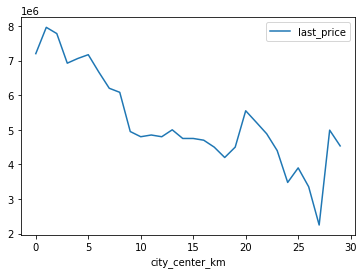

In [75]:
df_piter.pivot_table(index='city_center_km', values='last_price', aggfunc='median').plot()
plt.show()

Судя по графику центральная зона - 10 км.

Выделим сегмент квартир в центре.

In [76]:
center_df = df.query('cityCenters_nearest < 10000')

Проанализируем следующие параметры: площадь, цена, число комнат, высота потолков.

In [77]:
center_df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coef,kitchen_area_coef,meter_price,day_exposition,month_exposition,year_exposition
count,3185.000000,3.185000e+03,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,...,1888.000000,3185.000000,1947.000000,2828.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000
mean,9.413815,6.467302e+06,58.693705,2.104239,2.778725,8.287284,34.340859,4.550392,10.210054,0.348509,...,491.030191,1.028885,491.007191,200.458982,0.575922,0.183076,113785.763265,15.278493,6.302041,2017.289168
std,5.506808,2.039537e+06,19.931073,0.930599,0.229980,5.207990,14.617464,3.580033,4.429095,0.743302,...,362.458462,1.042643,258.551745,240.365645,0.105631,0.073304,27102.593716,8.640139,3.449175,1.079252
min,0.000000,1.219000e+04,12.000000,0.000000,2.400000,2.000000,2.000000,1.000000,2.000000,0.000000,...,11.000000,0.000000,22.000000,2.000000,0.038462,0.055556,112.000000,1.000000,1.000000,2014.000000
25%,5.000000,4.800000e+06,43.400000,1.000000,2.650000,5.000000,21.600000,2.000000,7.300000,0.000000,...,289.000000,0.000000,284.500000,45.000000,0.516129,0.133172,94444.000000,8.000000,3.000000,2017.000000
50%,9.000000,6.400000e+06,56.000000,2.000000,2.650000,6.000000,32.200000,4.000000,9.200000,0.000000,...,441.000000,1.000000,473.000000,105.000000,0.580000,0.172368,109333.000000,15.000000,6.000000,2017.000000
75%,13.000000,8.000000e+06,72.000000,3.000000,3.000000,10.000000,44.000000,5.000000,12.000000,0.000000,...,602.000000,2.000000,685.000000,259.000000,0.648148,0.213415,129545.000000,23.000000,9.000000,2018.000000
max,32.000000,1.070000e+07,114.200000,6.000000,3.490000,28.000000,90.200000,26.000000,48.300000,5.000000,...,3190.000000,3.000000,1313.000000,1497.000000,0.931034,0.612648,292308.000000,31.000000,12.000000,2019.000000


In [78]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_coef,kitchen_area_coef,meter_price,day_exposition,month_exposition,year_exposition
count,20788.000000,2.078800e+04,20788.000000,20788.000000,20788.000000,20788.000000,20788.000000,20788.000000,20788.000000,20788.000000,...,6276.000000,15391.000000,7289.000000,18290.000000,20788.000000,20788.000000,20788.000000,20788.000000,20788.000000,20788.000000
mean,9.662401,4.681342e+06,51.954443,1.895950,2.659974,10.817298,29.798033,5.896046,9.358583,0.594381,...,488.929095,0.689429,534.456853,170.681739,0.565352,0.189112,91241.400087,15.471907,6.395132,2017.392775
std,5.508128,2.026120e+06,17.156043,0.882361,0.144745,6.632336,12.274086,4.908683,3.607256,0.934673,...,323.828297,0.874870,276.902328,208.306122,0.099850,0.067456,29033.764897,8.641579,3.491644,1.015822
min,0.000000,1.219000e+04,12.000000,0.000000,2.340000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,16.000000,1.000000,0.038462,0.043524,112.000000,1.000000,1.000000,2014.000000
25%,6.000000,3.300000e+06,38.700000,1.000000,2.600000,5.000000,18.200000,2.000000,7.000000,0.000000,...,292.750000,0.000000,319.000000,43.000000,0.500000,0.140000,74263.500000,8.000000,3.000000,2017.000000
50%,9.000000,4.350000e+06,48.000000,2.000000,2.650000,9.000000,29.000000,4.000000,8.800000,0.000000,...,457.000000,0.000000,522.000000,90.000000,0.579304,0.180000,92113.000000,15.000000,6.000000,2017.000000
75%,14.000000,5.800000e+06,62.000000,3.000000,2.650000,16.000000,38.000000,8.000000,11.000000,1.000000,...,614.000000,1.000000,744.000000,217.000000,0.630435,0.227586,108333.000000,23.000000,10.000000,2018.000000
max,39.000000,1.070000e+07,114.200000,6.000000,3.490000,60.000000,93.600000,33.000000,50.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.000000,0.787879,312240.000000,31.000000,12.000000,2019.000000


В центральной части квартиры продаются дольше, среднее 105 вместо 90 по общей базе. Так же в центральной части больше площадь квартир и выше цена. Больше квартир с высокими потолками.

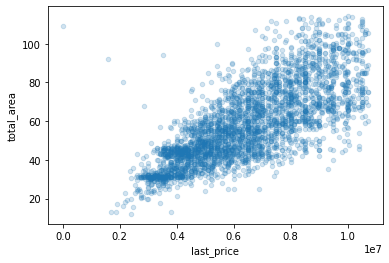

In [79]:
center_df.plot(x='last_price', y='total_area', kind='scatter', alpha=0.2)
plt.show()

Чем больше площадь - тем больше цена.

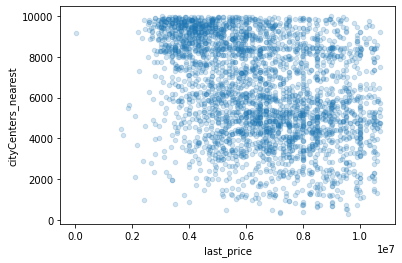

In [80]:
center_df.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.2)
plt.show()

С удалением от центра стоимость квартир падает.

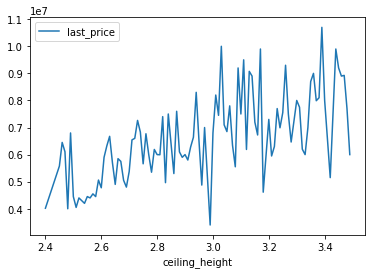

In [81]:
df_piter.pivot_table(index='ceiling_height', values='last_price', aggfunc='median').plot()
plt.show()

Видна зависимость, чем выше потолки, тем дороже квартиры.

In [82]:
def draw_plot(column):
    sns.lineplot(
        data=df.pivot_table(index=column, values='last_price', aggfunc='median'), 
        x=column, y='last_price'
    )
    sns.lineplot(
        data=center_df.pivot_table(index=column, values='last_price', aggfunc='median'), 
        x=column, y='last_price'
    )

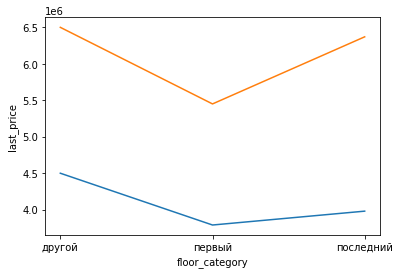

In [83]:
draw_plot('floor_category')

В центре первый этаж самый дешевый, а последний почти не отличается по цене от средних, в отличии от общей базы.

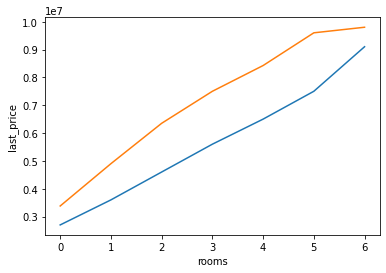

In [84]:
draw_plot('rooms')

С увеличением комнат растет и цена.

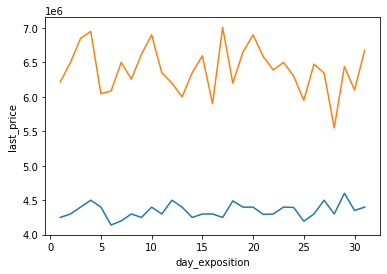

In [85]:
draw_plot('day_exposition')

День публикации никак не влияет на цену.

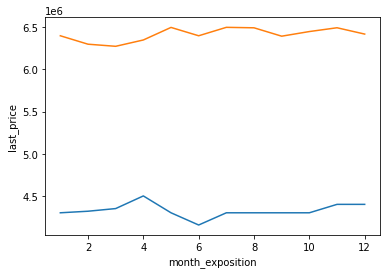

In [86]:
draw_plot('month_exposition')

Месяц публикации почти не влияет на цену.

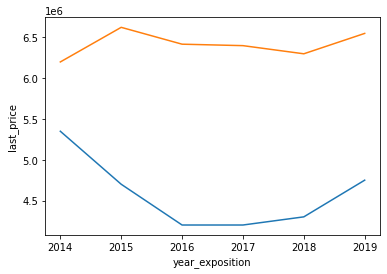

In [87]:
draw_plot('year_exposition')

Цены в 2014 году росли, потом было небольшое падение до 2018 и потом снова небольшой рост.

По центральной части и общей базе можно сделать вывод, что на цену влияют одинаковые факторы:
- площадь квартиры и число комнат.
- удаление от центра.
- высота потолков.<br>
Первые и последние этажи самые дешевые в общей базе в отличии от центральной части Санкт-Петербурга - там последний этаж почти не влияет на цену.<br>
В центральной части не было большого падения цен в 2014, даже наобот - был небольшой рост. В 2018 везде квартиры начали рости в цене.

## Общий вывод

При анализе и предобработке данных были найдены и заполнены пропуски значений. Обнаружены большие пропуски в картографических данных, желательно проверить или доработать алгоритм обработки и сбора этих данных. Изменены типы данных на более подходящий формат.
Добавлены новые данные по цене квадратного метра, соотношения площадей. 
Сделана категоризация и распределение данных по типам этажа квартиры. Убрали редкие и выбивающиеся значения.

Провели исследовательский анализ данных и определили какие факторы влияют на стоимость квартиры. На увеличение стоимости влияет площадь, количество комнат, высота потолков и удаленность от центра. Самые дешевые квартиры на первом и последнем этажах. День размещения объявления никак не влияет на цену. С 2014 по 2016 год было падение цен, потом пошел рост.<br>  Провели анализ 10 населённых пунктов с наибольшим числом объявлений - самые высокие цены в Санкт-Петербурге, а самые низкие в Выборге.  <br>
Выделили сегмент квартир в центре и проанализировали эту территорию.<br>
На цену влияют одинаковые факторы - площадь квартиры и число комнат, удаление от центра, высота потолков, этаж. Однако в Санкт-Петербурге последний этаж почти не влияет на цену. Так же в центральной части не было большого падения цен в 2014, даже наобот - был небольшой рост. В 2018 везде квартиры начали рости в цене.